In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


from flame_net.lib_uti import count_learnable_params
from flame_net.libSiva import CSolverSiva
#from flame_net.uti_plot import *
import os

from flame_net.libSiva import libSiva
from flame_net.libData import libData


%matplotlib inline
import pickle

#np.random.seed(seed=1653)


In [2]:
device = torch.device('cuda')
bRNN=False
T_in=1
data_channel = 1 # model.data_channel


In [3]:
#models[-2] #['model_name_detail'] = 'ONet_nu07_nStep20_branchfc_P50_feature5_best'



In [4]:
#device

In [5]:
#models[1]['model'].fc_PDEPara.fc_net[-2].out_features
#models[0]['model']
#models[1]['model']
#models[3] = {'alias':'pFNO_d', 'para_name':'Lpi','para_list':[], 'model_name_detail':'pFNO_m128w30Lpi6_24D5_share_skip_ln_o20_best' ,'nStep':1,'Tout':20,}

In [6]:
#models[3]['model'].en_conv0

In [7]:
#models[3]['model'].en_conv_PDEPara
#models[1]={'alias':'pFNO_D', 'para_name':'nu', 'para_list':[], 'model_name_detail':'  ' ,'nStep':1,'Tout':20,}

In [8]:


#models[6] = {'alias':'pCNN', 'para_name':'nu','para_list':[], 'model_name_detail':'std3_pConv_nu025_15d4_inception_less_ln_o20' ,'nStep':1,'Tout':20,}

In [70]:
#models[2]['model']

In [9]:
models=[
#   {'para_name':'nu', 'para_list':[], 'model_name_detail':'fcVM_Fourier_m128w30nu025_05_15_nPara1D4_skip_o20_best' ,'nStep':1,'Tout':20,},
#   {'para_name':'nu', 'para_list':[], 'model_name_detail':'Conv_nu025_05_15_nPara1d4_inception_less_o20_best','nStep':1,'Tout':20,},
#   {'para_name':'Lpi','para_list':[], 'model_name_detail':'fcVM_Fourier_m128w30Lpi6_12_24_nPara1D4_skip_o20_best' ,'nStep':1,'Tout':20,},
#   {'para_name':'Lpi','para_list':[], 'model_name_detail':'fc1_Conv_Lpi6_12_24_nPara1d4_inception_less_ln_o20_best','nStep':1,'Tout':20,},
    
  #{'para_name':'nu', 'para_list':[], 'model_name_detail':'fc1_Fourier_m64w30nu025_05_15_nPara1D3_share_skip_o20' ,'nStep':1,'Tout':20,},
  #{'para_name':'nu', 'para_list':[], 'model_name_detail':'Fourier_m64w30nu025_05_15_nPara1d3_skip_o20' ,'nStep':1,'Tout':20,},

  #{'para_name':'nu', 'para_list':[], 'model_name_detail':'Fourier_m128w30nu025_05_15_nPara1D4_share_skip_o20_ep900' ,'nStep':1,'Tout':20,},
  #{ 'para_name':'nu', 'para_list':[], 'model_name_detail':'Fourier_m128w30nu025_05_15_nPara1D5_share_skip_ln_o20_ep900' ,'nStep':1,'Tout':20,},
  

    
   #{'alias':'pFNO_D', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std_pFNO_m128w30nu025_15DOM7_share_skip_o20' ,'nStep':1,'Tout':20,}, # good
   #{'alias':'pFNO_D', 'para_name':'nu', 'para_list':[], 'model_name_detail':'Fourier_m128w30nu025_05_15_nPara1D5_share_skip_ln_o20_ep900' ,'nStep':1,'Tout':20,}, # good
   #{'alias':'pFNO_D', 'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m64w30nu025_15D4_share_skip_ln_o20' ,'nStep':1,'Tout':20,}, # good
   #{'alias':'pFNO_D', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std_pFNO_m128w25nu025_15D7_share_skip_o20' ,'nStep':1,'Tout':20,},   
   #{'alias':'pFNO_d', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std_pFNO_m128w25nu025_15ED7_share_skip_o20' ,'nStep':1,'Tout':20,},   
   #{'alias':'pFNO_d', 'para_name':'nu', 'para_list':[], 'model_name_detail':'testpFNO_m128w25nu025_15_share_skip_O20' ,'nStep':1,'Tout':20,},   
   #{'alias':'pFNO_d', 'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m128w30nu025_15ED5_share_skip_ln_o20_ep900' ,'nStep':1,'Tout':20,},   
   #{'alias':'pFNO_d', 'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m64w30nu025_15ED4_share_skip_ln_o20' ,'nStep':1,'Tout':20,},   
   #{'alias':'pFNO_d', 'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m128w25nu025_15ED5_share_skip_ln_SS_o20' ,'nStep':1,'Tout':20,},   
    
   #{'alias':'pFNO', 'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m128w25nu025_15_share_skip_ln_SS_o20' ,'nStep':1,'Tout':20,},   #good
   
    #{'alias':'pFNO', 'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m64w30nu025_15_share_skip_ln_o20' ,'nStep':1,'Tout':20,},   #good
   #{'alias':'pFNO*', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std_pFNO_m128w30nu025_15_share_skip_o20_ep1000' ,'nStep':1,'Tout':20,},   #good

#   {'alias':'pFNO',  'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m128w30nu025_15_share_o20' ,'nStep':1,'Tout':20,},   
    {'alias':'pFNO*', 'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m64w30nu025_15_share_o20' ,'nStep':1,'Tout':20,},  
    {'alias':'pFNO','para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m64w30nu025_15DOM6_share_o20' ,'nStep':1,'Tout':20,}, # good
#   {'alias':'pFNOc', 'para_name':'nu', 'para_list':[], 'model_name_detail':'ps_pFNO_m128w30nu025_15_share_skip_o20' ,'nStep':1,'Tout':20,},   #good
    #{'alias':'pFNO_d', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std_pFNO_m128w30nu025_15EDOM7_share_skip_o20' ,'nStep':1,'Tout':20,},   
#    {'alias':'pFNOs', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std_pFNO_m128w25nu025_15_share_skip_o20' ,'nStep':1,'Tout':20,},   #good
#    {'alias':'pFNOS', 'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m128w30nu025_15_share_skip_ln_o20' ,'nStep':1,'Tout':20,},   #good
    

   #{'alias':'pFNO', 'para_name':'nu', 'para_list':[], 'model_name_detail':'pFNO_m128w30nu025_15_share_skip_ln_SS_o20' ,'nStep':1,'Tout':20,},
    
   #{'para_name':'nu', 'para_list':[], 'model_name_detail':'Fourier2_m128w30nu025_05_15_nPara1_share_skip_ln_o20' ,'nStep':1,'Tout':20,},
  
    
    
    
  #{'alias':'pCNN', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std2_pConv_nu025_15d4_inception_less_ln_o20','nStep':1,'Tout':20,},
  #{'alias':'pCNN', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std2_pConv_nu025_15d6_inception_less_ln_o20','nStep':1,'Tout':20,},
  #{'alias':'pCNN', 'para_name':'nu', 'para_list':[], 'model_name_detail':'Conv_nu025_05_15_nPara1d4_inception_less_o20_best','nStep':1,'Tout':20,},
  {'alias':'pCNN', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std3_pConv_nu025_15d4_inception_less_ln_o20','nStep':1,'Tout':20,},

   #{'para_name':'Lpi','para_list':[], 'model_name_detail':'Fourier_m64w30Lpi6_12_24_nPara1d3_skip_o20_best' ,'nStep':1,'Tout':20,},
  #{'para_name':'Lpi','para_list':[], 'model_name_detail':'fc1_Fourier_m64w30Lpi6_12_24_nPara1D3_share_skip_o20_best' ,'nStep':1,'Tout':20,},
    
  {'alias':'pFNO', 'para_name':'Lpi','para_list':[], 'model_name_detail':'pFNO_m128w30Lpi6_24D5_share_skip_ln_o20_best' ,'nStep':1,'Tout':20,},
  {'alias':'pFNO*', 'para_name':'Lpi','para_list':[], 'model_name_detail':'pFNO_m128w30Lpi6_24_share_skip_ln_o20_best' ,'nStep':1,'Tout':20,}, #good
  #{'alias':'pFNO', 'para_name':'Lpi','para_list':[], 'model_name_detail':'pFNO_m128w30Lpi6_24_share_skip_ln_SS_o20_best' ,'nStep':1,'Tout':20,},    
  #{'para_name':'Lpi','para_list':[], 'model_name_detail':'Fourier2_m128w30Lpi6_12_24_nPara1_share_skip_ln_o20' ,'nStep':1,'Tout':20,},
  #{'para_name':'Lpi','para_list':[], 'model_name_detail':'Fourier_m128w30Lpi6_12_24_nPara1D4_share_skip_ln_o20' ,'nStep':1,'Tout':20,},
  #{'para_name':'Lpi','para_list':[], 'model_name_detail':'Conv_Lpi6_12_24_nPara1d4_inception_less_o20_best','nStep':1,'Tout':20,},
  
 #{'alias':'pCNN','para_name':'Lpi','para_list':[], 'model_name_detail':'fc1_Conv_Lpi6_12_24_nPara1d4_inception_less_ln_o20_best','nStep':1,'Tout':20,},
  {'alias':'pCNN','para_name':'Lpi','para_list':[], 'model_name_detail':'std_pConv_Lpi6_24d4_inception_less_ln_o20','nStep':1,'Tout':20,},

    
  #{'alias':'FNO','para_name':'nu','para_list':[], 'model_name_detail':'Fourier_m128w30nu025_share_skip_ln_o20_best','nStep':1,'Tout':20,},
  #{'alias':'FNO','para_name':'nu','para_list':[], 'model_name_detail':'Fourier_m128w30nu05_share_skip_ln_o20_best','nStep':1,'Tout':20,},
  #{'alias':'FNO','para_name':'nu','para_list':[], 'model_name_detail':'Fourier_m128w30nu15_share_skip_ln_o20_best','nStep':1,'Tout':20,},
    
]


#          {'model_name_detail':'Fourier_m64w30Lpi6_12_24_nPara1d3_skip_o20' ,'nu':6.0,'nStep':1,'Tout':20,},
#          {'model_name_detail':'Fourier_m64w30Lpi6_12_24_nPara1d3_skip_o20' ,'nu':12.0,'nStep':1,'Tout':20,},
#          {'model_name_detail':'Fourier_m64w30Lpi6_12_24_nPara1d3_skip_o20' ,'nu':24.0,'nStep':1,'Tout':20,},
#         {'model_name_detail':'Fourier_m64w30nu025_075_2_nPara1d3_skip_o20' ,'nu':0.075,'nStep':1,'Tout':20,},
#         {'model_name_detail':'Fourier_m64w30nu025_075_2_nPara1d3_skip_o20' ,'nu':0.1,'nStep':1,'Tout':20,},
#          {'model_name_detail':'Conv_Lpi6_12_24_nPara1d3_inception_less_o20' ,'nu':6.0,'nStep':1,'Tout':20,},
#          {'model_name_detail':'Conv_Lpi6_12_24_nPara1d3_inception_less_o20' ,'nu':12.0,'nStep':1,'Tout':20,},
#          {'model_name_detail':'Conv_Lpi6_12_24_nPara1d3_inception_less_o20' ,'nu':24.0,'nStep':1,'Tout':20,},
#          {'model_name_detail':'Conv_nu025_075_2_nPara1d4_inception_less_o20_best' ,'nu':0.075,'nStep':1,'Tout':20,},
#          {'model_name_detail':'Conv_nu025_075_2_nPara1d4_inception_less_o20_best' ,'nu':0.1,'nStep':1,'Tout':20,},
#         {'model_name_detail':'Fourier_m64w30nu025_075_2_nPara1_share_skip_o20_best' ,'nu':0.025,'nStep':1,'Tout':20,},
#         {'model_name_detail':'Conv_nu025_075_2_nPara1d3_inception_less_o20_best' ,'nu':0.025,'nStep':1,'Tout':20,},
#          {'model_name_detail':'Fourier_m64w30nu025_075_2_nPara1_share_skip_o20_best' ,'nu':0.1,'nStep':1,'Tout':20,},


In [10]:
def load_pkl( m ):
    str_filename = m['model_name_detail'] 
    if str_filename.find('_ep') >=0:         str_filename  = str_filename[ : str_filename.find('_ep') ]
    if str_filename.find('_best')>=0:        str_filename  = str_filename[ : str_filename.find('_best') ]
    open_file=open('./checkpoints/'+str_filename+ 'trainlog.pkl','rb')
    output_dict= pickle.load(open_file)
    open_file.close()
    #return output_dict    
    train_residual = np.array ( [ os for os  in output_dict['list_output_info'] ] )
    return train_residual 
    
def plot_training_resid( m, list_iy=[2,3], ys='log',ix=0):
    train_residual = load_pkl( m)
    line_style = ['r-', 'g-.','b--','k.']
    for idx, y in enumerate(list_iy):
        plt.plot( train_residual[:,ix], train_residual[:,y], line_style[idx])
        #plt.plot( train_residual[:,ix], train_residual[:,y],'b-')
    plt.yscale(ys)
    
    return [ train_residual[:, y ][-1] for  y in list_iy ]

def print_train_info( list_iy=[2,3,1], models=models ):
    for idx, m in enumerate( models):
        train_residual = load_pkl( m)
        #----------------
        if 'ONet' in m['model_name_detail']:            method='ONet'
        elif  'Fourier' in m['model_name_detail']:      method='Fourier'
        elif  'Conv' in m['model_name_detail']:         method='Conv'
        #----------------
        print(idx, method, m['model_name_detail'], m['nStep'] ,m['Tout'],  [ train_residual[:, y ][-1] for  y in list_iy ] ) 

In [11]:
#print_train_info()

[0.017951446013089387, 0.018588477782418338]

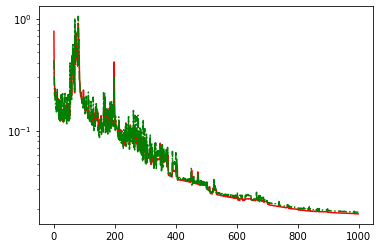

In [12]:
plot_training_resid (  models[0], [2,3],  ys='log' )

In [13]:
#plot_training_resid(models[0],ys='linear')

In [14]:
#list__init_str = ['rand_FFT_2_8','rand_FFT_2_8','rand_simple','rand_simple' ]
#list__init_str = ['rand_FFT_2_8','rand_simple','rand_FFT_2_8','rand_simple' ]
list__init_str = ['rand_simple','rand_simple','rand_simple','rand_simple','rand_simple','rand_simple' ]
list__init_str_LongTerm=[3]
#list__init_str_LongTerm=[]
# siva = [
#   {'nu':0.02, 'SivaEq':CSolverSiva([0.02]), 'N':512 ,'list_randseed':[66,1217,29163,16616] },
#   #{'nu':0.02, 'SivaEq':CSolverSiva([0.02]), 'N':512 ,'list_randseed':[5,1216,6,10] },
#   #{'nu':0.07, 'SivaEq':CSolverSiva([0.07]), 'N':128 ,'list_randseed':[32,81,101,112] } 
#   {'nu':0.07, 'SivaEq':CSolverSiva([0.07]), 'N':128 ,'list_randseed':[32,61,101,112] } 
# ]

list_randseed = [33,128,1639,219,78,97]
siva = [
  {'para_name':'nu', 'para_list':[], 'SivaEq':CSolverSiva('MS_RK4',[0.025, 0.15], method_default_siva_data_gen=4), 'N':256 ,'list_randseed':list_randseed },
  {'para_name':'Lpi','para_list':[], 'SivaEq':CSolverSiva('KS_RK4', [6.0, 24.0], method_default_siva_data_gen=4), 'N':256 ,'list_randseed':list_randseed  },
]
#  {'nu':0.025, 'SivaEq':CSolverSiva('MS_RK4',[0.025, 0.15], method_default_siva_data_gen=4), 'N':256 ,'list_randseed':[33,118,4269,13129] },
#   {'nu':0.075, 'SivaEq':CSolverSiva('MS_RK4', [0.075], method_default_siva_data_gen=4), 'N':256 ,'list_randseed':[33,118,4269,13129] },
#   {'nu':0.1, 'SivaEq':CSolverSiva('MS_RK4',[0.1] , method_default_siva_data_gen=4), 'N':256 ,'list_randseed':[33,118,4269,13129] },
#    {'nu':12.0,  'SivaEq':CSolverSiva('KS_RK4', [12.0], method_default_siva_data_gen=4), 'N':256 ,'list_randseed':[33,118,4269,13129] },
#    {'nu':24.0, 'SivaEq':CSolverSiva('KS_RK4', [24.0], method_default_siva_data_gen=4), 'N':256 ,'list_randseed':[33,118,4269,13129] },


siva_sys_name= MS_RK4
N= 256 ,dt_Output= 0.015 ,self.list_para = [0.025, 0.15] ,ActiveNoise_Amplitude=0.000000,stepfeq=1,k = 0 
siva_sys_name= KS_RK4
N= 256 ,dt_Output= 0.15 ,self.list_para = [6.0, 24.0] ,

In [15]:
def get_para_key(para_name, each_para_value):
    return '{}{:.3f}_'.format(para_name, each_para_value)

def get_sys(para_dict,siva=siva):
    for sys in siva:
        if para_dict['para_name'] == sys['para_name'] :
            return sys
    raise ValueError('did not find sys')

def get_d0(i_which,sys,each_para_value,list__init_str=list__init_str):
    np.random.seed(seed= sys['list_randseed'][i_which])
    
    #return sys['SivaEq'].get_init_func_from_txt(list__init_str[i_which])( {'siva_sys_name':sys['SivaEq'].siva_sys_name,'para_value':each_para_value } )

    if sys['SivaEq'].siva_sys_name == 'MS_RK4':
        return sys['SivaEq'].get_init_func_from_txt(list__init_str[i_which])( {'siva_sys_name':sys['SivaEq'].siva_sys_name,'para_value':0.025 } )
    else:
        return sys['SivaEq'].get_init_func_from_txt(list__init_str[i_which])( {'siva_sys_name':sys['SivaEq'].siva_sys_name,'para_value':24.0 } )


# def get_d0_from_nu(i_which,nu):
#     return  get_d0(i_which, get_sys(nu) )

def get_d0_all_from_nu(sys, each_para_value): # nu
    #sys = get_sys(nu)
    d0_all=[]
    for i_which in range( len(sys['list_randseed']) ): 
        d0 = get_d0(i_which, sys, each_para_value)
        d0_all.append(d0)
    return np.array( d0_all )

def update_sys(sys, para_dict):
    if para_dict['para_name'] != sys['para_name']: assert(False)
    #-----------
    for each_para_value in para_dict['para_list']:
        if each_para_value not in sys['para_list']:
            sys['para_list'].append(each_para_value)
            sys = sys__add_a_single_para(sys, para_dict['para_name'], each_para_value)
    return sys

def sys__add_a_single_para(sys, para_name, each_para_value):
    d0_all   = get_d0_all_from_nu( sys, each_para_value ) # ['nu'] )
    
    TotalTimeStep=2001
    list_d_an=[]
    # --- init starting from either rand_FFT or rand ---
    for d0 in d0_all:
        d_an = sys['SivaEq'].generate_dsol_single(TotalTimeStep, each_para_value, d0)  # d_an.shape ==numTotalTimeStep,  N
        print('d_an.shape=', d_an.shape)
        list_d_an.append(d_an) 
    
    # --- init starting from a long-term soluton ---
    for i_pick_longterm in list__init_str_LongTerm:
        d0 = list_d_an[i_pick_longterm][-1]
        d_an = sys['SivaEq'].generate_dsol_single(TotalTimeStep, each_para_value, d0) 
        print('d_an.shape=', d_an.shape)
        list_d_an.append(d_an) 
    
    each_para_key = get_para_key(para_name, each_para_value)
    
    sys[each_para_key+'list_d_an'] = np.array( list_d_an)
    sys['x'] = np.linspace(-1,1,sys['N'],endpoint=False)*np.pi 
    sys[each_para_key+'list_NormalizedTotalLen_an'] = libData.dsol_to_whole_length(sys['x'], sys[each_para_key+'list_d_an'])
    
    return sys





In [16]:
def clean_models(model_alias, para_name , model_name_detail = None, models= models ):
    for m in models:
        if m['alias'] == model_alias and m['para_name']==para_name:
            m['para_list'] = []
            m.pop('model', None )
            if model_name_detail is not None: 
                m['model_name_detail'] = model_name_detail
            return models
    print( 'Did not find model_alias={} para_name={} to clean'.format(model_alias, para_name)   )
    return models

In [17]:
#all ( [x in 'Fourier_nPara'.casefold() for x in ['fourier', 'npara'] ] )
#'nu'+'{:g}'.format(0.15)[2:]



In [18]:
# get_model('CNN', 'nu' , 0.025, 1, 20)

In [19]:
def load_model( model_name_detail):
    LocalFull_filename_Saved_Model =  './checkpoints/' + model_name_detail

    model = torch.load( LocalFull_filename_Saved_Model, map_location='cuda')
        
    print(model_name_detail, ' loaded in: count_learnable_params =' + str( count_learnable_params(model) ))
    return model

#def get_model(name, nu,nStep,Tout,models=models, bLoadModel=True):

#             alias_name
def get_model(name, para_name,each_para_value,nStep,Tout, models, bLoadModel=True):
    
    #if 'pfno' in name.casefold():        name_internal = 'pfno' #'fourier'
    #elif 'cnn' in name.casefold():      name_internal = 'conv'
    #elif 'onet' in name.casefold():     name_internal = 'onet'
    #----
    for m in models:
        
#       if name[0] == 'p': 

        list_keywords = [ para_name.casefold() ] #, 'npara' ]

        if m['alias']==name and all( [keyword in m['model_name_detail'].casefold() for keyword in list_keywords ] ) and \
            m['nStep']==nStep and m['Tout']==Tout:

            if 'model' not in m  and bLoadModel==True:
                m['model'] = load_model( m['model_name_detail'] )

                #-- special adjustment to yeild backward compatable with old codes
                if 'fourier' in  m['model_name_detail'].casefold()  and not hasattr(m['model'], 'PDEPara_mode_level')  and 'fourier2' not in  m['model_name_detail'].casefold() :
                    m['model'].PDEPara_mode_level = m['model'].PDEPara_depth 
                    for each_conv in m['model'].conv:
                        each_conv.PDEPara_mode_level = each_conv.PDEPara_depth
                    print('Special treatment for old-version of FNO: add PDEPara_mode_level')

            if each_para_value not in m['para_list']:
                m = update_model_pred(m, {'para_name':para_name,'para_list':[each_para_value] } )
            return m
        
#         else:
#             list_keywords = [ name_internal ]
#             if para_name.casefold() == 'nu':
#                 list_keywords += [  'nu'+'{:g}'.format(each_para_value)[2:]  ]
            
#             if  m['alias']==name and 'npara' not in m['model_name_detail'].casefold()  and all ( [keyword in  m['model_name_detail'].casefold() for keyword in list_keywords ] ) and m['nStep']==nStep and m['Tout']==Tout:

#                 if 'model' not in m  and bLoadModel==True:
#                     m['model'] = load_model( m['model_name_detail'] )
                    
#                 if each_para_value not in m['para_list']:
#                     m = update_model_pred(m, {'para_name':para_name,'para_list':[each_para_value] } )
                    
                
#                 return m
    print( m['model_name_detail'])                
    raise ValueError('did not find model')

def update_model_pred(m, para_dict):
    #if 'model' not in m:
    #m['model'] = load_model( m['model_name_detail'] )

    m = get_model_pred(m, para_dict)
    return m

def get_model_pred(m, para_dict):
    para_name = para_dict['para_name']
    para_list = para_dict['para_list']
    
    nStep = m['nStep']

    #----- Siva system ------
    sys = get_sys(para_dict, siva=siva)
    sys = update_sys(sys, para_dict)
    
    m['sys'] = sys
    m['x'] = sys['x']    
    #----
    NotYetReady__para_list = []
    for each_para_value in para_list:
        if each_para_value not in m['para_list']:
            NotYetReady__para_list.append(each_para_value)
    
    #-----
    for each_para_value in NotYetReady__para_list:
        m['para_list'].append(each_para_value)
        
        #---
        each_para_key = get_para_key(para_name, each_para_value)
        d0=sys[each_para_key+'list_d_an'][:,0,:] 
        d0_torch = torch.tensor(d0,dtype=torch.float).unsqueeze(-1)

        model = m['model']
        model.eval()
        with torch.no_grad():
            xx = d0_torch
            xx = xx.to(device)
            #print('get_model_pred: xx.shape', xx.shape)
            #print('get_model_pred: nu', nu)
            batch_size = xx.shape[0]
            
            
            if '_O' in m['model_name_detail']:
                T_out = 20
                for t in range(2000//nStep//T_out):
                    im = model(xx, torch.tensor(each_para_value).view(-1,1).repeat(batch_size,1).to(device) ) # , torch.tensor([nu]))
                    #--------------------
                    #print(t, 'im.shape=', im.shape)
                    if t == 0:     pred = torch.cat((xx, im[...,:T_out]), -1)
                    else:          pred = torch.cat((pred, im[...,:T_out]), -1)
                    #xx = im[...,-1:]
                    xx = im[...,T_out-1:]
            else:
                for t in range(2000//nStep):
                    im = model(xx, torch.tensor(each_para_value).view(-1,1).repeat(batch_size,1).to(device) ) # , torch.tensor([nu]))
                    #--------------------
                    if t == 0:     pred = torch.cat((xx, im), -1)
                    else:           pred = torch.cat((pred, im), -1)
                    #xx = torch.cat((xx[..., 1 * data_channel:], im), dim=-1)
                    xx = im
    
        list_pred = pred.detach().cpu().numpy()                   # list_pred.shape == (4, 512, 2000)
        
        m[each_para_key+'list_pred'] = np.moveaxis(list_pred,1,-1)

        #m['list_pred'] = np.moveaxis(list_pred,1,-1)
        print(each_para_key+'list_pred.shape=', m[each_para_key+'list_pred'].shape)

        #----
        # nu = m['nu']
        # sys = get_sys(nu)    
        #----
        m[each_para_key+'list_NormalizedTotalLen_pred'] = libData.dsol_to_whole_length(m['x'], m[each_para_key+'list_pred']  )

    return m

In [20]:
# m = get_model('FNO', para_dict={'para_name':'nu','para_list':[0.025]},nStep=1,Tout=20) 

In [21]:
#m = update_model_pred(m, para_dict={'para_name':'nu','para_list':[0.025]}   ) 

In [22]:
#for m in models: #[7:]:
#    m_m = update_model_pred(m_m)  

In [23]:
#libSiva.demo('ks', params={'N':256, 'nu':-0.025, 'Lpi':1,'mu':0, 'd_ratio':1, 'Nstep':1000,'dt':0.015, 'n_dt':5, 'show_ani':False, 'randfft':False } )

In [24]:
#sys = siva[0]

In [25]:
#update_sys(sys, {'para_name':'nu', 'para_list':[0.025, 0.1]}  )


In [26]:
#for sys in siva:
#    sys = update_sys(sys)

In [27]:
#for m_m in models[:] : #[7:]:
#    m_m = update_model_pred(m_m)   

In [28]:
#list_i_t_plot = [0,  50, 100,200,400 ,600,800,1000,1200,1400,1600,1800,2000]

list_i_t_plot = [0,            50, 125,250,500,750,1000,1250,1500,1750,2000]
#list_i_t_plot = [0,  8, 20, 40, 50, 125,250,500,750,1000,1250,1500,1750,2000]

#list_i_t_plot = [1, 20, 50, 80, 100,200,300,500,600,800,1000,1200,1400,1600,1800,2000]

 

In [29]:
#for m in models:
#   print( m['alias'], m['para_name'],m['para_list'], m['model_name_detail'])
#models[2]

In [30]:
def plot_disp_long(list_model_alias, para_name, list_para, list_init, nStep, Tout,Tin, png_filename=None,
                   list_i_t_plot= list_i_t_plot ,  models= models  ):
    
    list_lines_style=['-r','-.c', ':b']
    
    if para_name == 'nu':
        R_ratio = 1
    else: 
        R_ratio = 1.3
    #---------------------------------------------------------------------------
    nRow_per_init = len(list_init)//2
    figsize=(12, 2.5*len(list_para)* nRow_per_init )
    fig, axs = plt.subplots(   nRow_per_init *len(list_para),  2, sharex=True, sharey=True, figsize= figsize )
 
    list_save__plt_handle = [ None for _ in list_model_alias]
    
    for idx, each_para_value in enumerate( list_para):
        
        m = get_model( list_model_alias[0] , para_name, each_para_value, nStep, Tout,  models= models)
        x = m['x']
        each_para_key = get_para_key(para_name, each_para_value)
        
        
        #for ax, d_an, pred in zip(axs[idx*2:(idx+1)*2,:].reshape(-1), m['sys'][each_para_key+'list_d_an'], m[each_para_key+'list_pred'] ) :
        for ax, i_init in zip(axs[idx*nRow_per_init:(idx+1)*nRow_per_init,:].reshape(-1),   list_init) :
            
            for idx_model, model_alias in enumerate(list_model_alias):
                m = get_model( model_alias, para_name, each_para_value, nStep, Tout ,  models= models)
                
                d_an  =  m['sys'][each_para_key+'list_d_an'][i_init]
                pred  =  m[each_para_key+'list_pred'][i_init]

                for i in list_i_t_plot:
                    d = (i)/100
                    if i > 0: 
                        h_pred, = ax.plot( R_ratio * pred[i] + d,   x, list_lines_style[idx_model] , linewidth=1 )  #, linewidth=1.5 )
                        
                        list_save__plt_handle[idx_model] = h_pred
                    
                    if idx_model == 0:
                        h_ref,  = ax.plot( R_ratio * d_an[i] + d,   x,'--k' , linewidth=1 )

            #---------------------
            ax.set_yticks( [-np.pi, 0, np.pi] ); 
            ax.set_yticklabels(['$-\pi$', '0', '$\pi$'] ,  fontsize=14,rotation='vertical')
            ax.set_ylabel('x', fontsize=14, labelpad=0)

            ax.set_xlim ( [-0.3, 7.2*np.pi] )
            
            if R_ratio == 1: 
                ax.set_xlabel('$\phi(x,t)+t/100$', fontsize=14 )
            else:
                ax.set_xlabel('$1.3\phi(x,t)+t/100$', fontsize=14 )
                
            ax.set_xticks( [ 0,  2*np.pi,  4*np.pi,  6*np.pi ] );    
            ax.set_xticklabels(['0','2$\pi$', '4$\pi$' ,'6$\pi$' ] , fontsize=14 )
            #---------------------

            
    for ax in axs.flat:
        ax.label_outer()
    #plt.subplots_adjust(left=0.035, right=0.98, top=0.99, bottom=0.08, wspace=0.02)
    #plt.subplots_adjust(left=0.065, right=0.98, top=0.99, bottom=0.13, wspace=0.05)
    #plt.subplots_adjust(left=0.045, right=0.98, top=0.99, bottom=0.1, wspace=0.02,hspace=0.02)

    list_text_legend = ['Ref']+ [ '$'+model_alias+'$' for model_alias in list_model_alias]
    fig.legend( [h_ref]+list_save__plt_handle, 
                 list_text_legend ,
                bbox_to_anchor=(0.6+ 0.08*(len(list_model_alias)-1) ,0.1/(len(list_para)/2)) , ncol=len(list_model_alias)+1, fontsize=13 )

    fig.tight_layout()
    #plt.subplots_adjust(left=0.045, right=0.98, top=0.99, bottom=0.13, wspace=0.02, hspace=0.02)
    plt.subplots_adjust(left=0.045, right=0.975, top=0.99,  wspace=0.02, hspace=0.02)

    #fig.text(0.475, 0.005, 'd(x,t)+t/100', ha='center',fontsize=16)
    #fig.text(0.001, 0.52, 'x', va='center', rotation='vertical',fontsize=16 )

    #---------------------

    #fig.text(0.465, 0.001, 't/0.015', ha='center',fontsize=16)
    #fig.text(0.001, 0.52, 'x', va='center', rotation='vertical',fontsize=14 )

    #----
    if para_name=='Lpi':
        list_RightText = [ r'$\beta$='+str(each_para_value)   for each_para_value in list_para[::-1]]
    elif para_name=='nu':
        list_RightText = [ r'$\nu$='+str(each_para_value)   for each_para_value in list_para[::-1]]
    dy =(1-0.05)/(len(list_para)*nRow_per_init)
    for idx in range(nRow_per_init*len(list_para)):
        ypos = 0.05+(0.5+idx)*dy
        fig.text(0.98, ypos, list_RightText[idx//nRow_per_init],  rotation='vertical',fontsize=14 ,transform=plt.gcf().transFigure, verticalalignment='center') #, weight='bold')
    #---------------------
        
    
    if png_filename is not None:
        print('savefig: ', png_filename)
        if 'eps' in png_filename:
            plt.savefig(png_filename, format='eps')
        else:
            plt.savefig(png_filename, dpi=300)
    #return fig,axs

pFNO_m64w30nu025_15_share_o20  loaded in: count_learnable_params =62717
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 s

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


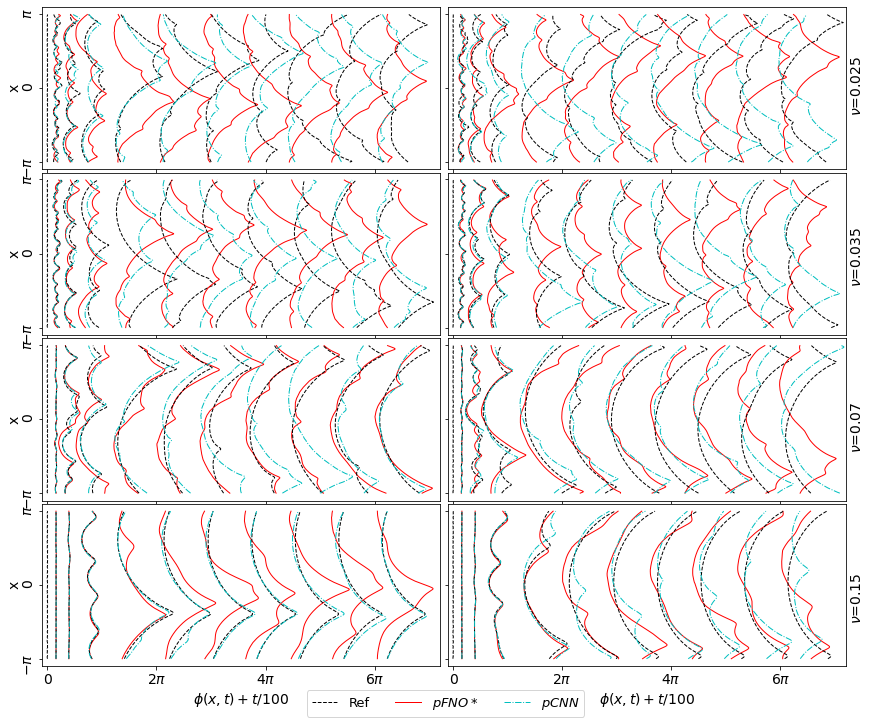

In [31]:
#list_para_values = [0.03,0.0425,0.06,0.085,0.125]


#list_para_values = [0.025,0.035,0.05,0.07,0.1,0.15]
list_para_values = [0.025,0.035,0.07,0.15] 
model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  =['pFNO*', 'pCNN'], 'nu',list_para_values, [1,2], 1,  20,1, None # 'disp_nu02_fourier_o20_Revision.png'
png_filename =  'disp_MS.eps'
#
plot_disp_long(model_name, para_name, list_para, list_init, nStep, Tout, T_in, png_filename ,  models= models )
#

In [32]:
#list_para_values = [0.025,0.035,0.05,0.07,0.1,0.15]
list_para_values = [0.03,0.0425,0.06,0.085,0.125]
model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  =['pFNO*','pFNO'], 'nu',list_para_values, [1,3], 1,  20,1, None # 'disp_nu02_fourier_o20_Revision.png'
png_filename = None 
# plot_disp_long(model_name, para_name, list_para, list_init, nStep, Tout, T_in, png_filename ,  models= models )



In [33]:
#models.append( {'alias':'pFNOs', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std_pFNO_m128w25nu025_15_share_skip_o20' ,'nStep':1,'Tout':20,} )
#models.append(     {'alias':'pFNOc', 'para_name':'nu', 'para_list':[], 'model_name_detail':'ps_pFNO_m128w30nu025_15_share_skip_o20' ,'nStep':1,'Tout':20,} )

#models = clean_models('pFNOS','nu', model_name_detail='pFNO_m128w30nu025_15_share_skip_o20', models= models)
#models = clean_models('pFNO','nu', model_name_detail='pFNO_m64w30nu025_15_share_skip_ln_o20', models= models)
#models = clean_models('pFNO','nu', model_name_detail='pFNO_m64w30nu025_15_share_o20', models= models)

#models = clean_models('pFNO_d','nu', model_name_detail='pFNO_m128w30nu025_15DOM7_share_o20', models= models)

#models = clean_models('pCNN','Lpi', model_name_detail='std_pConv_Lpi6_24d4_inception_less_ln_o20', models= models)

#   {'alias':'pFNO', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std_pFNO_m128w30nu025_15_share_skip_o20' ,'nStep':1,'Tout':20,},   #good
#   {'alias':'pFNO*', 'para_name':'nu', 'para_list':[], 'model_name_detail':'std_pFNO_m64w30nu025_15_share_skip_o20' ,'nStep':1,'Tout':20,},   #good

In [34]:
#models

In [35]:
#model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  ='FNO', 'nu',[0.025,0.035,0.05,0.075,0.15,0.2], [2,3], 1,  20,1, None # 'disp_nu02_fourier_o20_Revision.png'

#model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  ='pFNO_d', 'nu',[0.025,0.05,0.1,0.15], [0,1,2,3], 1,  20,1, None # 'disp_nu02_fourier_o20_Revision.png'

#model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  =[ 'pFNO','pFNO_D' ], 'nu',[0.025,0.05,0.1,0.15], [0,3], 1,  20,1, None # 'disp_nu02_fourier_o20_Revision.png'
model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  =['pFNO*','pCNN'], 'nu',[0.025,0.04,0.064,0.1,0.16], [0,2], 1,  20,1, None # 'disp_nu02_fourier_o20_Revision.png'
png_filename = None # 'disp_MS.png'

# plot_disp_long(model_name, para_name, list_para, list_init, nStep, Tout, T_in, png_filename,  models= models)

In [36]:
# def autocorr4(x,lags):
#     '''fft, don't pad 0s, non partial'''
#     mean=x.mean()
#     var=np.var(x)
#     xp=x-mean

#     cf=np.fft.fft(xp)
#     sf=cf.conjugate()*cf
#     corr=np.fft.ifft(sf).real/var/len(x)

#     return corr[:lags]

# def autocorr(x):
#      result = np.correlate(x, x, mode='full')
#      return result[result.shape[0]//2:]

# im=0; j = 100; ipick = 4


# strcolor = 'rbckm'
# fig,axs = plt.subplots(1,2, figsize=(25,8)) 
# for ipick in range(4):
#     x= models[im]['nu0.025_list_pred'][ipick ,j]
#     x_an = models[im]['sys']['nu0.025_list_d_an'][ipick ,j]
#     #axs[0].plot( x )
#     axs[0].plot( autocorr4(x_an,128), '-'+strcolor[ipick] )
#     axs[0].plot( autocorr4(x,128) ,'--'+strcolor[ipick] )


In [37]:
# plt.figure(figsize=(25,8)) 
# im=0; j = 1; ipick = 3
# plt.plot( models[im]['sys']['nu0.025_list_d_an'][ipick ,j],'r-' )
# plt.plot( models[im]['sys']['nu0.160_list_d_an'][ipick ,j],'k-' ) 
# plt.plot( models[im]['nu0.025_list_pred'][ipick ,j],'m--' )
# plt.plot( models[im]['nu0.160_list_pred'][ipick ,j],'b:' ) 

In [38]:
#
#model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  =['pFNO*'], 'nu',[0.025,0.04,0.064,0.16], [0,1], 1,  20,1, None # 'disp_nu02_fourier_o20_Revision.png'
#png_filename = 'disp_MS_pFNO_dD.png'
#plot_disp_long(model_name, para_name, list_para, list_init, nStep, Tout, T_in, png_filename , models= models )

pFNO_m128w30Lpi6_24D5_share_skip_ln_o20_best  loaded in: count_learnable_params =236077
rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


savefig:  disp_KS.eps


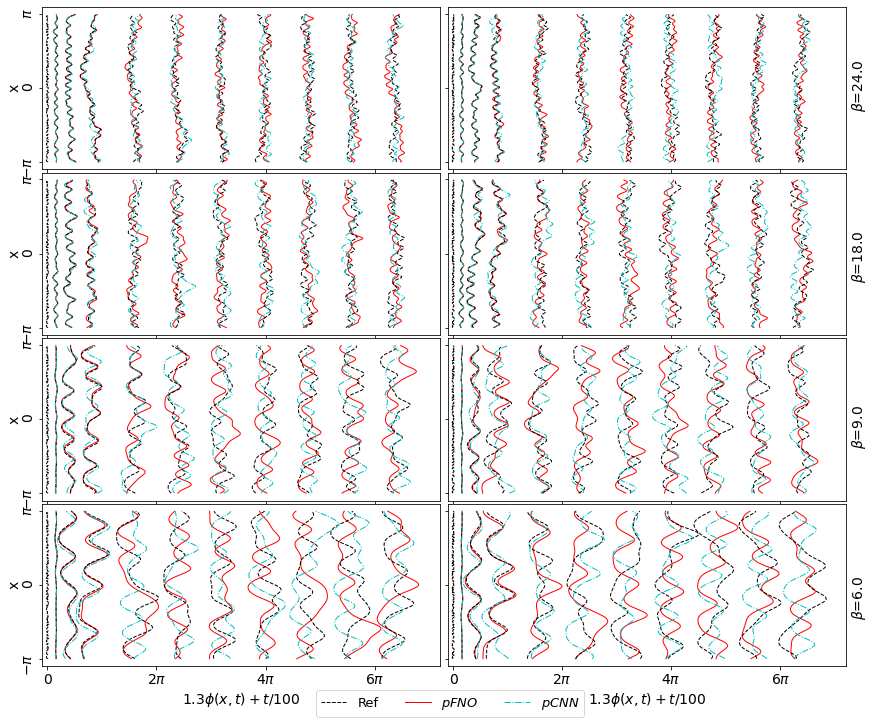

In [39]:
#model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  ='pFNO_d', 'Lpi',[24.0, 18.0, 12.0, 9.0, 6.0],[1,2], 1, 20, 1, None # 'disp_nu02_fourier_o20_Revision.png'
#                                                                                                     [21.0, 15.0, 11.5, 8.5]

#list_para_values = [24.0, 21.0, 18.0, 15.0, 12.0, 10.5, 9.0, 7.5, 6.0]  # [21.0, 15.0, 10.5, 7.5] # [ 24.0, 18.0, 12.0, 9.0, 6.0]  

#list_para_values = [ 24.0, 18.0, 12.0, 9.0, 6.0]   # [21.0, 15.0, 10.5, 7.5] # 
list_para_values = [ 24.0,  18.0,  9.0, 6.0]   # [21.0, 15.0, 10.5, 7.5] # 

model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  =['pFNO', 'pCNN'], 'Lpi',list_para_values ,[1,2], 1, 20, 1, None 
png_filename = 'disp_KS.eps'

plot_disp_long(model_name, para_name, list_para, list_init, nStep, Tout, T_in, png_filename ,  models= models  )


In [40]:
list_para_values =  [21.0, 15.0, 10.5, 7.5] # 

model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  =['pFNO', 'pFNO_d'], 'Lpi',list_para_values ,[1,2], 1, 20, 1, None 
png_filename = None #'disp_KS.png'

#plot_disp_long(model_name, para_name, list_para, list_init, nStep, Tout, T_in, png_filename ,  models= models  )


In [41]:

#models[-1] = update_model_pred(models[-1])


In [42]:

def plot_short_disp(list_models_for_cmp, list__i_pickplot__init_d0=[0,1,4],
                  shortlist_i_t_plot = [0, 8, 20, 40 ,80],
                  png_filename=None, figsize=None, 
                  linestyle = ['-r',':c','-.g'] ,
                  xlim_set=[ [-1.2, 1.6*np.pi], [-0.1,  0.52*np.pi] ] , models= models):
    
    
    #----------------
    list__nStep_all       =[]
    list__m_all           = []
    list__each_para_key_all=[]
    list__pred_all          =[]
    for models_for_cmp in list_models_for_cmp:
        #-------
        nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
        m_all     = [ get_model(**m_, models= models) for m_ in models_for_cmp]
        each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
        pred_all = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ] 
        #------
        list__nStep_all.append(nStep_all)
        list__m_all.append(m_all) 
        list__each_para_key_all.append(each_para_key_all) 
        list__pred_all.append(pred_all )
    
    #-----------
    str__para_name        = r'$\nu$='  if models_for_cmp[0]['para_name']=='nu' else r'$\mathcal{L}$=' 
    str__para_name_legend = [ str__para_name+str(m['each_para_value'])    for m in models_for_cmp ]
    #----------
    
    
    #----------------
    # nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
    # m_all     = [ get_model(**m_, models= models) for m_ in models_for_cmp]
    # each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
    # pred_all = [ m[each_para_key+'list_pred'] for m, each_para_key in zip(m_all,each_para_key_all) ] 
    #---------------        
    x = m_all[0]['x']

        
    #---------------------------------------------------------------------------
    nCols = len(list__i_pickplot__init_d0)
    nRows = len( models_for_cmp )
    if figsize is None:         figsize= [2*nRows,3.5*nCols]

    fig, axs = plt.subplots( nRows, nCols , sharex=False,  figsize= figsize) #sharey=True,
    
    #fig, axs = plt.subplots(1+1+1, 3 , sharex=False, sharey=True, figsize= figsize )

    #pred_allmodes_selectedplot = [ m_['list_pred'][ [1,3,4] ] for m_ in m_all ] 

    

    for icol, ax_cols in enumerate( np.transpose(axs)) :

        i_pickplot = list__i_pickplot__init_d0[icol]
        #-----------
        #d_an     = m_all[0]['sys']['list_d_an'][ i_pickplot ]
        #d_ans     =  [ m['sys'][each_para_key+'list_d_an'][ i_pickplot ]  for m,each_para_key in zip(m_all,each_para_key_all) ] 

        num_models = len(list__pred_all) 
        
        #
        #list__pred_all[num_models][num_paras][num_d0][2000][256]
        #
        
        #----------
        def plot_disp_list_A ( ax, jPara_Row, i_pickplot, list__pred_all=list__pred_all,list__nStep_all=list__nStep_all, list_i_t_plot=shortlist_i_t_plot):
            h_preds = ['' for _ in range( len(list__pred_all) ) ]
            for i in list_i_t_plot:  # [0, 8, 20, 40 ,80],
                if i_pickplot>=4:        d = (i)/30
                else:                    d = (i)/80
                
                for idx in range( num_models ):
                    nStep = list__nStep_all[idx][jPara_Row]
                    if i%nStep==0 and i>0: 
                        i_actual = i//nStep
                        h_preds[idx], = ax.plot(   list__pred_all[idx][jPara_Row][i_pickplot][i_actual] + d,   x, linestyle[idx] ); 
                
                each_para_key = list__each_para_key_all[idx][jPara_Row]
                d_an  =  list__m_all[idx][jPara_Row]['sys'][each_para_key+'list_d_an'][ i_pickplot ] 
                h_ref, = ax.plot(  d_an[i] + d,   x,  '--k' , linewidth=1 )
                
            return [h_ref, *h_preds]
        
        for jPara_Row in range( nRows ) :
            h_s = plot_disp_list_A ( ax_cols[jPara_Row], jPara_Row   ,i_pickplot  ) 
            if icol== nCols-1 and jPara_Row==0: 
                txt_legends = ['Ref']+ [ '$'+models_for_cmp[0]['name']+'$' for models_for_cmp in list_models_for_cmp] 
                ax_cols[0].legend(h_s, txt_legends, fontsize=12)
        
#         #----------
#         pred_pickplot = [ m_pred[ i_pickplot ] for m_pred in pred_all ]
#         def plot_disp_list(ax,list_m_pick, i_pickplot, pred_pickplot=pred_pickplot,d_ans=d_ans,list_i_t_plot=shortlist_i_t_plot,nStep_all=nStep_all):
#             h_preds = ['' for _ in list_m_pick]
#             linesytyle=['-r', '-.g',]
#             for i in list_i_t_plot:
#                 if i_pickplot>=4:        d = (i)/30
#                 else:                    d = (i)/80
                
#                 for idx, m_pick in enumerate(list_m_pick):
#                     nStep = nStep_all[m_pick]
#                     if i%nStep==0 and i>0: # for those with nStep >1
#                         i_actual = i//nStep
#                         h_preds[idx], = ax.plot(  pred_pickplot[m_pick][i_actual]+d,   x, linesytyle[idx] ); 
                        
#                 #h_ref, = ax.plot(  d_an[i] + d,   x,'--k' , linewidth=1 )
#                 h_ref, = ax.plot(  d_ans[ list_m_pick[0] ][i] + d,   x,'--k' , linewidth=1 )
#             return [h_ref, *h_preds]
#         h_s0 = plot_disp_list(ax_cols[0], [ 0, 1] ,i_pickplot )
#         h_s1 = plot_disp_list(ax_cols[1], [ 2, 3] ,i_pickplot )
#         if len(m_all) ==6: h_s2=plot_disp_list(ax_cols[2], [ 4, 5] ,i_pickplot )
#         else:              h_s2=plot_disp_list(ax_cols[2], [ 4   ] ,i_pickplot )
        #----------
        
        # if icol==nCols-1: 
        #     ax_cols[0].legend(h_s0,['Ref', models_for_cmp[0]['name'] ,models_for_cmp[1]['name']], fontsize=12)
        #     ax_cols[1].legend(h_s1,['Ref', models_for_cmp[2]['name'] ,models_for_cmp[3]['name']], fontsize=12)
        #     if len(m_all)==6:
        #         ax_cols[2].legend(h_s2,['Ref', models_for_cmp[4]['name'] ,models_for_cmp[5]['name']], fontsize=12)
        #     else:
        #         ax_cols[2].legend(h_s2,['Ref', models_for_cmp[4]['name'] ] , fontsize=12)
            
        for j ,  ax in enumerate(ax_cols):
            ax.set_yticks( [-np.pi, 0, np.pi] ); 
            ax.set_yticklabels(['$-\pi$', '0', '$\pi$'] ,  fontsize=14,rotation='vertical')
            ax.set_ylabel('x', fontsize=14, labelpad=0)
            if i_pickplot >=4:  
                ax.set_xlim ( xlim_set[0] )
                ax.set_xlabel('d(x,t)+t/30', fontsize=14 )
                ax.set_xticks( [ 0,  np.pi ]); ax.set_xticklabels(['0','$\pi$' ] , fontsize=14 )
            else:
                ax.set_xlim ( xlim_set[1] )
                ax.set_xlabel('d(x,t)+t/80', fontsize=14  )
                ax.set_xticks( [ 0,  np.pi/4]); ax.set_xticklabels(['0','$\pi/4$' ] , fontsize=14 )

            if icol == len(np.transpose(axs))-1:
                #print('len(ax_cols)-1', len(ax_cols)-1)
                #print(icol,str__para_name_legend[icol])
                ax.yaxis.set_label_position("right")
                ax.set_ylabel(str__para_name_legend[j], fontsize=14,labelpad=0.5)

 
    for ax in axs.flat:
        ax.label_outer()

 
        
        
    fig.tight_layout()
    #plt.subplots_adjust(left=0.035, right=0.98, top=0.99, bottom=0.08, wspace=0.02)
    #plt.subplots_adjust(left=0.065, right=0.98, top=0.99, bottom=0.13, wspace=0.05)
    #plt.subplots_adjust(left=0.055, right=0.98, top=0.99, bottom=0.05, wspace=0.02,hspace=0.02)
    plt.subplots_adjust(wspace=0.02,hspace=0.02)

    #--------------
    # para_list = [ each_models['each_para_value'] for each_models in list_models_for_cmp[0]]
    # str__para_name = r'$\nu$='  if list_models_for_cmp[0][0]['para_name']=='nu' else r'$\mathcal{L}$=' 
    # list_RightText = [ str__para_name + str(para)   for para in para_list[::-1]]
    # dy =(1-0.05)/len(para_list) 
    # for idx in range(  len(para_list) ):
    #     ypos = 0.01+(0.5+idx)*dy
    #     fig.text(0.988, ypos, list_RightText[idx ],  rotation='vertical',fontsize=14 ,transform=plt.gcf().transFigure) #, weight='bold')
    #---------------------       

    
    if png_filename is not None:
        plt.savefig(png_filename, dpi=300)
        print('save png: ', png_filename)


In [43]:
#----------------
# models_for_cmp=[
#     {'name':'pFNO_d','para_name':'nu','each_para_value':0.025, 'nStep':1,'Tout':20},
#     {'name':'pFNO_d','para_name':'nu','each_para_value':0.075, 'nStep':1,'Tout':20},
#     {'name':'pFNO_d','para_name':'nu','each_para_value':0.15, 'nStep':1,'Tout':20},
# ]
# models_for_cmp2=[
#     {'name':'pFNO','para_name':'nu','each_para_value':0.025, 'nStep':1,'Tout':20},
#     {'name':'pFNO','para_name':'nu','each_para_value':0.075, 'nStep':1,'Tout':20},
#     {'name':'pFNO','para_name':'nu','each_para_value':0.15, 'nStep':1,'Tout':20},
# ]
# models_for_cmp3=[
#     {'name':'pCNN','para_name':'nu','each_para_value':0.025, 'nStep':1,'Tout':20},
#     {'name':'pCNN','para_name':'nu','each_para_value':0.075, 'nStep':1,'Tout':20},
#     {'name':'pCNN','para_name':'nu','each_para_value':0.15, 'nStep':1,'Tout':20},
#  ]
#plot_short_disp( [models_for_cmp2, models_for_cmp3], list__i_pickplot__init_d0=[0,1,4], shortlist_i_t_plot = [ 0, 8, 20, 40 ,80],
#                png_filename=png_filename, figsize=[9,9], linestyle = ['-r',':c','-.g'], models= models)


png_filename = 'disp_MS_short.png'

list_model_names = [ 'pFNO*','pCNN' ] #, 'pCNN' ] #'pFNO_d'
list_para_values = [0.025,0.064,0.1,0.16]  # [0.025, 0.075, 0.15]  #[0.025, 0.04, 0.064,0.16] 
list_models_for_cmp =[ [{'name':model_name, 'para_name':'nu','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]


#plot_short_disp( list_models_for_cmp, list__i_pickplot__init_d0=[0,3,4], shortlist_i_t_plot = [ 0, 8, 20, 40 ,80],  png_filename=png_filename, figsize=[9,9], linestyle = ['-r',':c','-.g'],  models= models)


In [44]:
 
# models_for_cmp=[
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#     #{'name':'pFNO_d', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#     #{'name':'pFNO_d', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
# ]

# models_for_cmp2=[
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#     #{'name':'pFNO', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#     #{'name':'pFNO', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
# ]
# models_for_cmp3=[
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#     #{'name':'pCNN', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#     #{'name':'pCNN', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
# ]

png_filename ='disp_KS_short.png' 
list_model_names = [ 'pFNO', 'pCNN' ] #'pFNO_d'
list_para_values = [21.0, 15.0, 10.5, 7.5] # [21.0, 15.0, 11.5, 8.5] # [24.0, 18.0 , 6.0 ] 
list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]



#plot_short_disp( list_models_for_cmp , list__i_pickplot__init_d0=[0,1,4], shortlist_i_t_plot = [ 0, 10, 20, 40 ,80],
#                 png_filename=png_filename, figsize=[9,9], linestyle = ['-r',':c','-.g'], xlim_set=[ [-0.7, 1.35*np.pi], [-0.1,  0.38*np.pi] ] , models= models)


In [45]:
#models[0]

In [72]:
def plot_para_len (list_models_for_cmp, list_init,  png_filename=None, ylim=(0.9,2.1) , models= models ):

    nRow_per_init = len(list_init)//2
    
    fig, axs = plt.subplots(nRow_per_init*len(list_models_for_cmp),len(list_init),sharex=True, sharey=True,figsize= [12,1.4*len(list_models_for_cmp)*nRow_per_init ])

    for  i_nu, models_for_cmp in enumerate(list_models_for_cmp):
        #---
        nSkip_all       = [ m_['nStep'] for m_ in models_for_cmp]
        m_all       = [ get_model(**m_ , models= models ) for m_ in models_for_cmp]
        
        #---
        each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
        pred_all = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ]     
        #---
        
        len_an_all       = m_all[0]['sys'][each_para_key_all[0]+'list_NormalizedTotalLen_an']
        len_pred_all = [ m_[each_para_key_all[idx]+'list_NormalizedTotalLen_pred'] for idx, m_ in enumerate(m_all) ] 
        
        #len_pred_all = [ m_[each_para_key_all[idx]+'list_pred'].mean(-1) for idx, m_ in enumerate(m_all) ] 
        
        #----------------------
        list_plot_style = ['-r','-.b',':c','--b', ':m',':b']
        #--------------------------------------------------------------------
        list_legend =['Ref'] +  ['$'+ m['name'] + '$' for m in models_for_cmp ]
        
        for  idx_, ax  in enumerate( axs[i_nu*nRow_per_init:(i_nu+1)*nRow_per_init,: ].reshape(-1) ):
            i_d0 = list_init[idx_]
            
            ax.set_yticks( [ 1, 1.5, 2, 2.5] )
            ax.set_yticklabels(['1', '1.5', ' ',' '], rotation='vertical',  fontsize=12 )
            ax.set_xticks( [ 0,  500, 1000, 2000] )
            ax.set_xticklabels(['0','500', '1000' ,'2000'], fontsize=12)
            ax.set_xlabel( 't/0.015', fontsize=14) 
            #ax.set_ylim(.9,2.1)
            ax.set_ylim(*ylim)

            
            len_an = len_an_all[i_d0]
            nnn=np.arange(2000+1)

            ax.plot( nnn, len_an,'--k' , lw=1)
            list_len_pred = [ len_[i_d0] for len_ in  len_pred_all ] 

            for idx, len_pred in enumerate( list_len_pred):
                nnn = np.arange( 2000// nSkip_all[idx] + 1 ) *nSkip_all[idx]
                ax.plot(nnn, len_pred, list_plot_style[idx] , lw=1)

                #ax.plot(  len_pred, '-r' )
                #ax.plot(  len_pred1, '-.c' )
                #ax.plot(  len_predC, '--g' )
                #ax.plot(  len_pred1C, '--m' )
            if i_nu==0 and idx_==1:
                ax.legend(list_legend ,ncol=4,  loc='best', fontsize=12)

    #plt.subplots_adjust(left=0.045, right=0.98, top=0.99, bottom=0.13, wspace=0.02, hspace=0.02)
    plt.subplots_adjust(left=0.047, right=0.975, top=0.99, bottom=0.08, wspace=0.02, hspace=0.02)
    #fig.text(0.4, 0.001, 't/0.015', ha='center',fontsize=14)
    fig.text(0.001, 0.52, 'normalized total length', va='center', rotation='vertical',fontsize=14 )

    para_list = [ models_for_cmp[0]['each_para_value'] for models_for_cmp in list_models_for_cmp]


    str__para_name = r'$\nu$='  if list_models_for_cmp[0][0]['para_name']=='nu' else r'$\beta$=' 
    #list_RightText = [ r'$\nu$='+ str(para)   for para in para_list[::-1]]
    list_RightText = [ str__para_name + str(para)   for para in para_list[::-1]]
    
    
    dy =(1-0.05)/len(para_list)/nRow_per_init
    for idx in range( nRow_per_init*len(para_list) ):
        ypos = 0.01+(0.5+idx)*dy
        fig.text(0.98, ypos, list_RightText[idx//nRow_per_init],  rotation='vertical',fontsize=14 ,transform=plt.gcf().transFigure) #, weight='bold')
    #---------------------
    if png_filename is not None:
        print('savefig: ', png_filename)
        if 'eps' in png_filename:
            plt.savefig(png_filename, format='eps')
        else:
            plt.savefig(png_filename, dpi=300)            


pFNO_m64w30nu025_15DOM6_share_o20  loaded in: count_learnable_params =120893
nu0.025_list_pred.shape= (7, 2001, 256)
nu0.035_list_pred.shape= (7, 2001, 256)
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 25

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


nu0.150_list_pred.shape= (7, 2001, 256)
savefig:  len_MS.eps


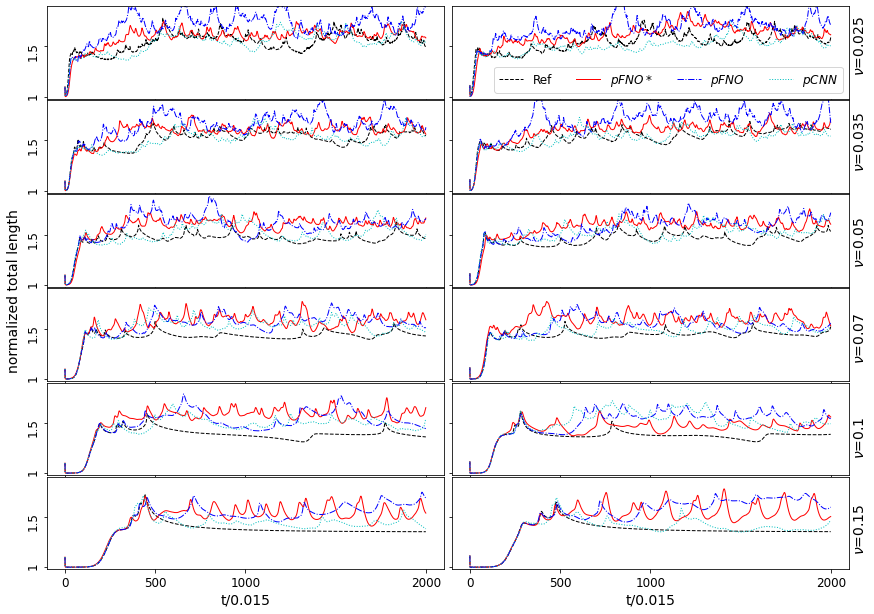

In [47]:
# models_for_cmp=[
#     [{'name':'pFNO', 'para_name':'nu','each_para_value':0.025 ,'nStep':1,'Tout':20},
#      {'name':'pFNO_D', 'para_name':'nu','each_para_value':0.025 ,'nStep':1,'Tout':20},
#      {'name':'pFNO_d', 'para_name':'nu','each_para_value':0.025 ,'nStep':1,'Tout':20},
#     ],
#     [{'name':'pFNO', 'para_name':'nu','each_para_value':0.04 ,'nStep':1,'Tout':20},
#      {'name':'pFNO_D', 'para_name':'nu','each_para_value':0.04 ,'nStep':1,'Tout':20},
#      {'name':'pFNO_d', 'para_name':'nu','each_para_value':0.04 ,'nStep':1,'Tout':20},
#     ],
#     [{'name':'pFNO', 'para_name':'nu','each_para_value':0.064 ,'nStep':1,'Tout':20},
#      {'name':'pFNO_D', 'para_name':'nu','each_para_value':0.064 ,'nStep':1,'Tout':20},
#      {'name':'pFNO_d', 'para_name':'nu','each_para_value':0.064 ,'nStep':1,'Tout':20},
#     ],
#     [ {'name':'pFNO', 'para_name':'nu','each_para_value':0.16 ,'nStep':1,'Tout':20},
#      {'name':'pFNO_D', 'para_name':'nu','each_para_value':0.16 ,'nStep':1,'Tout':20},
#       {'name':'pFNO_d', 'para_name':'nu','each_para_value':0.16 ,'nStep':1,'Tout':20},
#      ],list_model_names = ['pFNO*', 'pFNO', 'pFNO_D', 'pFNO_d']


#list_para_values = [0.025, 0.04, 0.064, 0.16]  #0.035
#list_para_values = [0.025,0.035,0.05,0.07,0.1,0.15]

list_para_values = [0.025,0.035,0.05,0.07,0.1, 0.15]
list_model_names = [   'pFNO*', 'pFNO','pCNN'] #, 'pCNN'] #'pFNO_d'
list_models_for_cmp =[ [{'name':model_name, 'para_name':'nu','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for model_name in list_model_names] 
                         for para_value in list_para_values ]

png_filename = 'len_MS.eps'
plot_para_len ( list_models_for_cmp, [1,5], png_filename, ylim=(0.98,1.9), models= models)
#plot_para_len ( list_models_for_cmp, [0,2], png_filename, ylim=(-.01,.01), models= models)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


savefig:  len_KS.eps


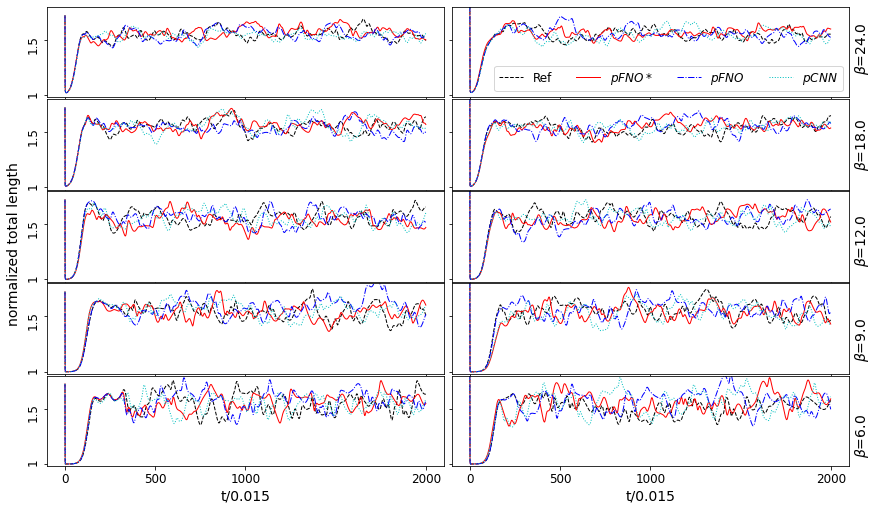

In [73]:
# models_for_cmp=[
#     [{'name':'pFNO_d', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#      {'name':'pFNO', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#      {'name':'pCNN', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20}, 
#     ],
#     [{'name':'pFNO_d', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#      {'name':'pFNO', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#      {'name':'pCNN', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20}, 
#     ],
#     [{'name':'pFNO_d', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#      {'name':'pFNO', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#      {'name':'pCNN', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20}, 
#     ],
#     [{'name':'pFNO_d', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#      {'name':'pFNO', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#      {'name':'pCNN', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20}, 
#     ],
#     [{'name':'pFNO_d', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
#       {'name':'pFNO', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
#       {'name':'pCNN', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20}, 
#      ],
# ]


list_model_names = ['pFNO*', 'pFNO', 'pCNN'] #, 'pCNN']
#list_para_values =  [24.0, 21.0, 18.0, 15.0, 12.0, 10.5, 9.0, 7.5, 6.0] 
#list_para_values = [24.0, 18.0, 12.0, 9.0, 6.0] 
list_para_values = [24.0, 18.0, 12.0, 9.0,6.0] 
#list_para_values =  [21.0, 15.0, 10.5, 7.5] #[21.0, 15.0, 11.5, 8.5] #  #[0.025, 0.04, 0.064,0.16] 
list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for model_name in list_model_names] 
                         for para_value in list_para_values ]


png_filename = 'len_KS.eps'


plot_para_len (list_models_for_cmp, [1,2], png_filename,ylim=(0.98,1.8), models= models)


In [49]:
def autocorr4(x,lags):
    '''fft, don't pad 0s, non partial'''
    mean=x.mean(axis=-1, keepdims=True)
    #var=np.var(x, axis=-1, keepdims=True)
    xp=x-mean

    cf=np.fft.fft(xp)
    sf=cf.conjugate()*cf
    corr=np.fft.ifft(sf).real/x.shape[-1] #/var

    return corr[..., :lags]


In [50]:
def plot_para_autocorrelation(list_models_for_cmp , i_pickplot,  png_filename=None, models= models, bAutoCorr=False, n_steady = 500, ylim=None) : # list__i_pickplot__init_d0=[1]
    #list__i_pickplot__init_d0=[1,3]
    
    list__nStep_all       =[]
    list__m_all           = []
    list__each_para_key_all=[]
    list__pred_all          =[]
    for models_for_cmp in list_models_for_cmp:
        #-------
        nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
        m_all     = [ get_model(**m_ , models= models) for m_ in models_for_cmp]
        each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
        pred_all = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ] 
        #------
        list__pred_all.append(pred_all )
        
        
    #---------------        
    x = m_all[0]['x']
    N = m_all[0]['sys']['N']
    
    levels= np.linspace(-1,1,20)
    cmap= 'rainbow'

    #-----------
    N_end =2000
    def get_yy_xx(nStep,x=x, N_end = N_end, N_corr=N//2 ):
        y = np.arange(2000//nStep+1) * nStep
        xx,yy = np.meshgrid(x,y,indexing='xy')
        return yy[:N_end, :N_corr],xx[:N_end, :N_corr]
 

    def calc_autocorrlation(disp, N=N, N_end=N_end, N_corr = N//2 ):
        return autocorr4( disp[:N_end,:], N_corr)
    #------

    nRow = len(models_for_cmp)
    num_models = len(list_models_for_cmp) 
    
    
    
    ####################################################
    xx = np.linspace( 0, np.pi, N//2)
    linestyles= ['r--', 'b-.','c:','g--']
    fig, axs = plt.subplots(1, nRow ,sharex=True, sharey=True,figsize= [12,3])
    #fig, axs = plt.subplots( nRow , 1 ,sharex=True, sharey=True,figsize= [5,6])
    for i, ax in enumerate(  axs ) :
        #-----------
        d_ans     = m_all[0]['sys'][each_para_key_all[i]+'list_d_an']  # [ i_pickplot ]
        #-----------    
        
        corr_ref = calc_autocorrlation(d_ans)[:,n_steady:,:].mean(axis=(0,1) )
        
        ax.plot( xx, corr_ref/corr_ref[0]    , color='lightgrey',  linewidth=4  )
        
        for j in range( num_models ):
            pred_pickplot = list__pred_all[j][i] # [ i_pickplot ]
            #ax_cols.plot( *get_yy_xx(1) , calc_autocorrlation(pred_pickplot)[n_steady:,:].mean(axis=0) , 'r-'   )

            corr_model_pred = calc_autocorrlation(pred_pickplot)[:,n_steady:,:].mean(axis=(0,1) )
            if bAutoCorr==True:
                ax.plot(xx,   corr_model_pred/corr_model_pred[0] , linestyles[j]    )
            else:
                ax.plot(xx,   corr_model_pred/corr_ref[0] , linestyles[j]    )
        
        str__para_name = r'$\nu$='  if models_for_cmp[0]['para_name']=='nu' else r'$\beta$=' 
        
        ax.set_title( str__para_name+'{}'.format( models_for_cmp[i]['each_para_value'] ), fontsize=14)

        if i==len(axs)-1:
            txt_legends = ['Ref']+ [ '$'+models_for_cmp[0]['name']+'$' for models_for_cmp in list_models_for_cmp] 
            ax.legend(txt_legends, fontsize=10)
        
        #ax.hlines(0,0,np.pi,'k','--',linewidth=0.3)
        #-----------    
    
#     ####################################################
    
#     fig, axs = plt.subplots(nRow, num_models+1+1 ,sharex=True, sharey=True,figsize= [12,nRow*2*1.25])
#     cols = ['Ref'] + [ models_for_cmp[0]['name'] for models_for_cmp in list_models_for_cmp ]
#     #----------
#     rows = ['{:g}'.format( model['each_para_value']) for model in models_for_cmp ]

#     for ax, col in zip(axs[0], cols):
#         ax.set_title('$'+col+'$', fontsize=14)
#     #----------
    
#     for icol, ax_cols in enumerate(  axs ) :
#         #-----------
#         d_an     = m_all[icol]['sys'][each_para_key_all[icol]+'list_d_an'][ i_pickplot ]
#         #-----------    
#         ax_cols[0].contourf( *get_yy_xx(1)   , calc_autocorrlation(d_an)       , levels = levels ,cmap=cmap  )

#         for idx, pred_all in enumerate(list__pred_all):
#             pred_pickplot =  pred_all[icol][ i_pickplot ]
#             ax_cols[idx+1].contourf( *get_yy_xx(1), calc_autocorrlation(pred_pickplot), levels = levels ,cmap=cmap  )   
#         #-----------    
 
                
#         for ax in ax_cols:
#             ax.set_yticks( [-np.pi, 0, np.pi] )
#             ax.set_ylabel('x',fontsize=14)
            
#             ax.xaxis.set_tick_params(labelsize=14)
#             ax.set_xlabel('t/0.015',fontsize=14)
            
    for ax in axs.flat:
        ax.label_outer()
        ax.set_xlim( [0,np.pi])
        #ax.set_ylim( [-1, 1] )
        ax.set_xticks( [0,   np.pi] )
        ax.set_xticklabels(['0',  '$\pi$'  ] , fontsize=14 )

        if ylim is not None:
            ax.set_ylim( ylim )
        
#     fig.tight_layout()
    plt.subplots_adjust(wspace=0.07,hspace=0)


#     #----
#     str__para_name = r'$\nu$='  if models_for_cmp[0]['para_name']=='nu' else r'$\mathcal{L}$=' 
    
#     list_legend = [  m['each_para_value'] for m in models_for_cmp ]
#     dy =(0.95-0.05)/len(list_legend)
#     for idx, legend_text in enumerate(list_legend[::-1]):
#         ypos = 0.05+(0.5+idx)*dy
#         #fig.text(0.985, ypos, legend_text,  rotation='vertical',fontsize=14 ,transform=plt.gcf().transFigure, weight='bold')
#         fig.text(0.9878, ypos, str__para_name+str(legend_text),  rotation='vertical',fontsize=13 ,transform=plt.gcf().transFigure) #, weight='bold')
    #---    
        
    if png_filename is not None:
        print('save png: ',png_filename )
        plt.savefig(png_filename,dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


save png:  corr_MS.eps


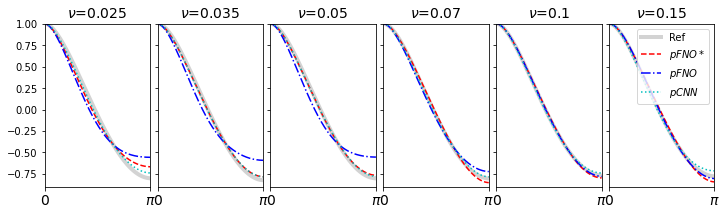

In [51]:
bAutoCorr = True # False

list_model_names = ['pFNO*', 'pFNO', 'pCNN' ] #,'pFNOc'] #,'pCNN'] #, 'pFNO_D' ]#  ,'pCNN' ]
#list_para_values = [0.025,0.04,0.064,0.1,0.16] # [0.025, 0.05, 0.1,0.15]  #[0.025, 0.04, 0.064,0.16] 
list_para_values = [0.025,0.035,0.05,0.07,0.1,0.15]
list_models_for_cmp =[ [{'name':model_name, 'para_name':'nu','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]


png_filename= 'corr_MS.eps'

#plot_para_autocorrelation(list_models_for_cmp, i_pickplot=3, png_filename=png_filename, models= models, bAutoCorr = bAutoCorr , ylim=[-1.5,1.8])
plot_para_autocorrelation(list_models_for_cmp, i_pickplot=3, png_filename=png_filename, models= models, bAutoCorr = bAutoCorr , ylim=[-0.9,1])

In [52]:
#plot_para_autocorrelation(list_models_for_cmp, i_pickplot=3, png_filename=png_filename, models= models, bAutoCorr = bAutoCorr ,n_steady = 500)

rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
rand_d0_simple, scale= 0.03
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
nu0.030_list_pred.shape= (7, 2001, 256)
r

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


save png:  corr1_MS.eps


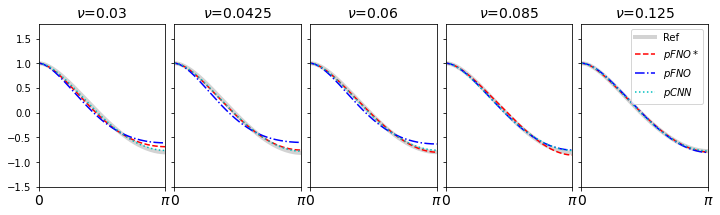

In [53]:
#bAutoCorr = False # True
bAutoCorr =  True

list_model_names = ['pFNO*', 'pFNO' , 'pCNN' ] # , 'pCNN' ] #, 'pFNO_D' ]#  ,'pCNN' ]
#list_para_values = [0.025,0.04,0.064,0.1,0.16] # [0.025, 0.05, 0.1,0.15]  #[0.025, 0.04, 0.064,0.16] 
list_para_values = [0.025,0.035,0.05,0.07,0.1,0.15]
list_para_values = [0.03,0.0425,0.06,0.085,0.125]
list_models_for_cmp =[ [{'name':model_name, 'para_name':'nu','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]
png_filename= 'corr1_MS.eps'
plot_para_autocorrelation(list_models_for_cmp, i_pickplot=3, png_filename=png_filename, models= models,bAutoCorr= bAutoCorr,ylim=[-1.5,1.8])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


save png:  corr_KS.eps


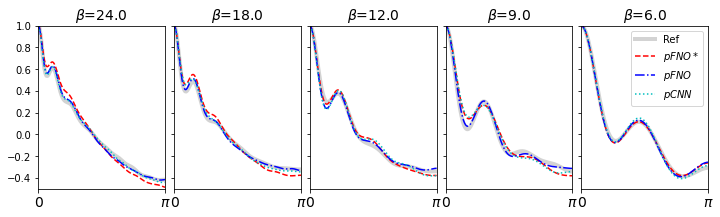

In [54]:
bAutoCorr = True #False

list_model_names = ['pFNO*', 'pFNO','pCNN'] #,'pCNN']
list_para_values = [ 24.0, 18.0, 12.0, 9.0, 6.0]
#list_para_values = [24.0, 21.0, 18.0, 15.0, 12.0, 10.5, 9.0, 7.5, 6.0]  # [21.0, 15.0, 10.5, 7.5] #   
list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]

png_filename= 'corr_KS.eps'

#plot_para_autocorrelation(list_models_for_cmp, i_pickplot=3, png_filename=png_filename , models= models,bAutoCorr=bAutoCorr,ylim=[-0.55,1.4])
plot_para_autocorrelation(list_models_for_cmp, i_pickplot=3, png_filename=png_filename , models= models,bAutoCorr=bAutoCorr,ylim=[-0.5,1])



rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
rand_d0_simple, scale= 0.1
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
RK4NumericalSolver_usol: large t.size=( 2001 ); a single-dot is printed for 1000 steps
..d_an.shape= (2001, 256)
Lpi21.000_list_pred.shape= (7, 2001, 256)
rand_

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


save png:  corr1_KS.eps


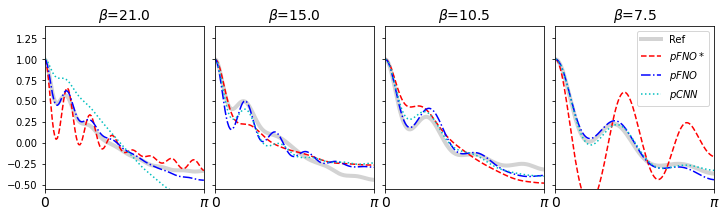

In [55]:
bAutoCorr = True

list_model_names = ['pFNO*','pFNO','pCNN'] #,'pCNN']
list_para_values = [21.0, 15.0, 10.5, 7.5] #   
list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]
png_filename= 'corr1_KS.eps' #
plot_para_autocorrelation(list_models_for_cmp, i_pickplot=3, png_filename=png_filename , models= models, bAutoCorr=bAutoCorr,ylim=[-0.55,1.4])


In [56]:
def plot_errors(list_models_for_cmp , i_pickplot,  png_filename=None, models= models) : # list__i_pickplot__init_d0=[1]
    #list__i_pickplot__init_d0=[1,3]

    
    list__nStep_all       =[]
    list__m_all           = []
    list__each_para_key_all=[]
    list__pred_all          =[]
    for models_for_cmp in list_models_for_cmp:
        #-------
        nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
        m_all     = [ get_model(**m_ , models= models) for m_ in models_for_cmp]
        each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
        pred_all = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ] 
        #------
        list__pred_all.append(pred_all )
        
    #-----------
    str__para_name        = r'$\nu$='  if models_for_cmp[0]['para_name']=='nu' else r'$\beta$=' 
    str__para_name_legend = [ str__para_name+str(m['each_para_value'])    for m in models_for_cmp ]
    #----------
        
    
    #---------------        
    x = m_all[0]['x']
    N = m_all[0]['sys']['N']
    
    levels= np.linspace(0,0.1,20)
    cmap= 'rainbow'

    #-----------
    N_end = 2001 #1500
    def get_yy_xx(nStep,x=x, N_end = N_end):
        y = np.arange(2000//nStep+1) * nStep
        xx,yy = np.meshgrid(x,y,indexing='xy')
        #return yy,xx
        return yy[:N_end],xx[:N_end]

    def calc_slope( disp, N=N, N_end=N_end ):
        slope= np.diff(disp,axis=1,append=disp[:,0:1])/(2*np.pi/N)
        return slope[:N_end]
    #------

    nRow = len(models_for_cmp)

    
    num_models = len(list_models_for_cmp) 
    fig, axs = plt.subplots(nRow, num_models ,sharex=True, figsize= [2.5*num_models ,nRow*2*1])
    #fig, axs = plt.subplots(nRow, num_models+1 ,sharex=True, sharey=True,figsize= [12,nRow*2*1.25], facecolor = 'aliceblue')
    cols =[ models_for_cmp[0]['name'] for models_for_cmp in list_models_for_cmp ]

    
    #----------
    rows = ['{:g}'.format( model['each_para_value']) for model in models_for_cmp ]

    for ax, col in zip(axs[0], cols):
        ax.set_title('$'+col+'$', fontsize=14)

    for icol, ax_cols in enumerate(  axs ) :
        
        #i_pickplot = list__i_pickplot__init_d0[icol]
        #-----------
        d_an     = m_all[icol]['sys'][each_para_key_all[icol]+'list_d_an'][ i_pickplot ][...,:N_end]
        #-----------    
        #ax_cols[0].contourf( *get_yy_xx(1)    , d_an          , levels = levels ,cmap=cmap  )

        
        for idx, pred_all in enumerate(list__pred_all):
            pred_pickplot =  pred_all[icol][ i_pickplot ][...,:N_end]
            
            pos = ax_cols[idx].contourf( *get_yy_xx(1)    , ((pred_pickplot - d_an)**2/(d_an**2).mean(axis=(-2,-1),keepdims=True))**0.5 , levels = levels ,cmap=cmap  )   
            
            #fig.colorbar(pos , ax=ax_cols[idx])    
        #-----------    
        for idx, ax in enumerate(ax_cols):
            
            ax.set_yticks( [-np.pi, 0, np.pi] )
            if icol == 0:  
                ax.set_yticklabels(['-$\pi$', '0', '$\pi$'], fontsize=14,rotation='vertical')
            else:
                ax.set_yticklabels(['-$\pi$', '0', ''], fontsize=14,rotation='vertical')
            ax.set_ylabel('x',fontsize=14)

            ax.set_xticks( [0, 50, 100] )
            ax.set_xticklabels(['0', '50', '100'], fontsize=14)

            
            ax.xaxis.set_tick_params(labelsize=14)
            ax.set_xlabel('t/0.015',fontsize=14)

            if idx == len(ax_cols)-1: 
                ax.yaxis.set_label_position("right")
                ax.set_ylabel( str__para_name_legend[icol],fontsize=14)
            
    for ax in axs.flat:
        ax.label_outer()
        ax.set_xlim([0,150])
    fig.tight_layout(  )
    plt.subplots_adjust(wspace=0.01,hspace=0.01)
    
        
    if png_filename is not None:
        print('save png: ',png_filename )
        plt.savefig(png_filename,dpi=300)

save png:  err_MS.png


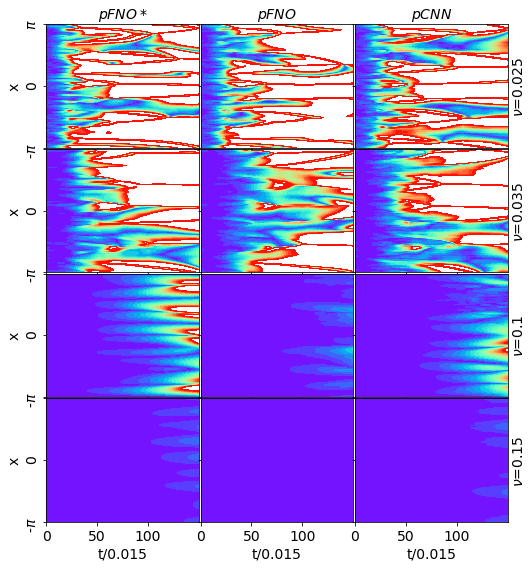

In [57]:

#list_model_names = ['pFNO*','pFNO_D', 'pFNOs','pFNOc','pCNN']

list_model_names = ['pFNO*','pFNO', 'pCNN'] 

#list_para_values = [0.025,0.04,0.064,0.16] # [0.025, 0.05, 0.1,0.15]  #[0.025, 0.04, 0.064,0.16] 
#list_para_values = [0.025,0.035,0.05,0.07,0.1,0.15]

list_para_values = [0.025,0.035,0.1,0.15]

#list_para_values = [0.03,0.0425,0.06,0.085,0.125]
#list_para_values = [0.025,0.03,0.035,0.0425, 0.05,0.06,0.085, 0.1,0.125,0.15]

list_models_for_cmp =[ [{'name':model_name, 'para_name':'nu','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for para_value in list_para_values ] 
                         for model_name in list_model_names ]

png_filename=   'err_MS.png'
plot_errors(list_models_for_cmp, i_pickplot = 1, png_filename=png_filename, models= models)

save png:  err_KS.png


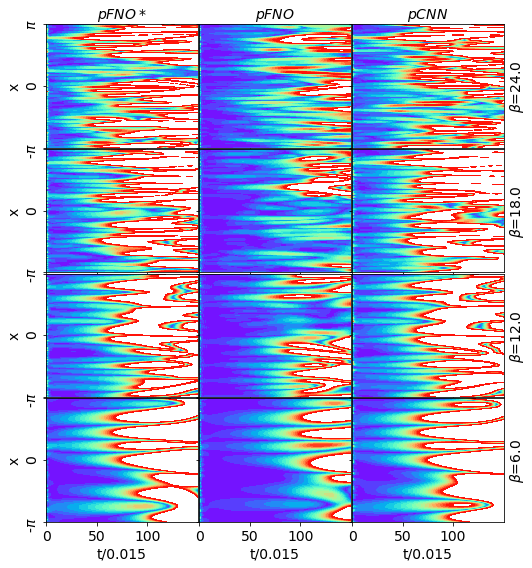

In [58]:

list_model_names = ['pFNO*', 'pFNO' ,'pCNN' ]

#list_para_values = [24.0, 21.0, 18.0, 15.0, 12.0, 10.5, 9.0, 7.5, 6.0]  # [21.0, 15.0, 10.5, 7.5] # [ 24.0, 18.0, 12.0, 9.0, 6.0]  
#list_para_values = [21.0, 15.0, 10.5, 7.5] #[21.0, 15.0, 11.5, 8.5] #

#list_para_values = [ 24.0, 18.0, 12.0, 9.0, 6.0]  
list_para_values = [ 24.0, 18.0, 12.0,  6.0]  

list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]

png_filename= 'err_KS.png' # 'uSlope_KS.png'

plot_errors(list_models_for_cmp, i_pickplot=2, png_filename=png_filename , models= models)


In [59]:
def plot_para_slope(list_models_for_cmp , i_pickplot,  png_filename=None, models= models) : # list__i_pickplot__init_d0=[1]
    #list__i_pickplot__init_d0=[1,3]

    
    list__nStep_all       =[]
    list__m_all           = []
    list__each_para_key_all=[]
    list__pred_all          =[]
    for models_for_cmp in list_models_for_cmp:
        #-------
        nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
        m_all     = [ get_model(**m_ , models= models) for m_ in models_for_cmp]
        each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
        pred_all = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ] 
        #------
        list__pred_all.append(pred_all )
        
    #-----------
    str__para_name        = r'$\nu$='  if models_for_cmp[0]['para_name']=='nu' else r'$\beta$=' 
    str__para_name_legend = [ str__para_name+str(m['each_para_value'])    for m in models_for_cmp ]
    #----------
        
    # if models_for_cmp2 is not None:
    #     nStep_all2 = [    m_['nStep'] for m_ in models_for_cmp2] 
    #     m_all2     = [ get_model(**m_ , models= models) for m_ in models_for_cmp2]
    #     each_para_key_all2 = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp2] 
    #     pred_all2 = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all2,each_para_key_all2) ] 
    
    #---------------        
    x = m_all[0]['x']
    N = m_all[0]['sys']['N']
    
    #levels= np.linspace(-2.5,2.5,20)
    levels= np.linspace(-4,4,20)
    cmap= 'rainbow'

    #-----------
    N_end = 2000 #1500
    def get_yy_xx(nStep,x=x, N_end = N_end):
        y = np.arange(2000//nStep+1) * nStep
        xx,yy = np.meshgrid(x,y,indexing='xy')
        #return yy,xx
        return yy[:N_end],xx[:N_end]

    def calc_slope( disp, N=N, N_end=N_end ):
        slope= np.diff(disp,axis=1,append=disp[:,0:1])/(2*np.pi/N)
        return slope[:N_end]
    #------

    nRow = len(models_for_cmp)

    # if models_for_cmp2 is not None:
    #     fig, axs = plt.subplots(nRow, 3 ,sharex=True, sharey=True,figsize= [12,nRow*2*1.25])
    #     cols = ['Ref',  models_for_cmp[0]['name'],  models_for_cmp2[0]['name'] ]
    # else:
    #     fig, axs = plt.subplots(nRow, 2 ,sharex=True, sharey=True,figsize= [12,nRow*2*1.25])
    #     cols = ['Ref',  models_for_cmp[0]['name'] ]
    num_models = len(list_models_for_cmp) 
    fig, axs = plt.subplots(nRow, num_models+1 ,sharex=True, figsize= [12,nRow*2*1.25])
    #fig, axs = plt.subplots(nRow, num_models+1 ,sharex=True, sharey=True,figsize= [12,nRow*2*1.25], facecolor = 'aliceblue')
    cols = ['Ref'] + [ models_for_cmp[0]['name'] for models_for_cmp in list_models_for_cmp ]

    
    #----------
    rows = ['{:g}'.format( model['each_para_value']) for model in models_for_cmp ]

    for ax, col in zip(axs[0], cols):
        ax.set_title('$'+col+'$', fontsize=14)

#     pad = 5 # in points
#     for ax, row in zip(axs[:,0], rows):
#         #ax.set_ylabel(row, rotation=90, size='large')
#         ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
#                     xycoords=ax.yaxis.label, textcoords='offset points',
#                     size='large', ha='right', va='center')
        
    #----------
    
    for icol, ax_cols in enumerate(  axs ) :
        
        #i_pickplot = list__i_pickplot__init_d0[icol]
        #-----------
        d_an     = m_all[icol]['sys'][each_para_key_all[icol]+'list_d_an'][ i_pickplot ]
        #-----------    
        ax_cols[0].contourf( *get_yy_xx(1)    , calc_slope(d_an)          , levels = levels ,cmap=cmap  )

        for idx, pred_all in enumerate(list__pred_all):
            pred_pickplot =  pred_all[icol][ i_pickplot ]
            ax_cols[idx+1].contourf( *get_yy_xx(1)    , calc_slope(pred_pickplot) , levels = levels ,cmap=cmap  )   
        #-----------    
 
        # if models_for_cmp2 is not None:
        #     pred_pickplot2 =  pred_all2[icol][ i_pickplot ]
        #     ax_cols[2].contourf( *get_yy_xx(1)    , calc_slope(pred_pickplot2) , levels = levels ,cmap=cmap  )   
                
        for idx, ax in enumerate(ax_cols):
            
            ax.set_yticks( [-np.pi, 0, np.pi] )
            if icol == 0:  
                ax.set_yticklabels(['-$\pi$', '0', '$\pi$'], fontsize=14,rotation='vertical')
            else:
                ax.set_yticklabels(['-$\pi$', '0', ''], fontsize=14,rotation='vertical')
            ax.set_ylabel('x',fontsize=14)
            
            #ax.set_xticks( [ 0,100,200,300,400 , 500] )
            #ax.set_xticklabels(['0','100','200','300','400','500'], fontsize=14)
            ax.xaxis.set_tick_params(labelsize=14)
            ax.set_xlabel('t/0.015',fontsize=14)

            if idx == len(ax_cols)-1: 
                ax.yaxis.set_label_position("right")
                ax.set_ylabel( str__para_name_legend[icol],fontsize=14)
            
    for ax in axs.flat:
        ax.label_outer()
        #ax.set_xlim([0,2000])
        
    fig.tight_layout(  )
    plt.subplots_adjust(wspace=0.01,hspace=0.01)

    #fig.text(0.465, 0.001, 't/0.015', ha='center',fontsize=16)
    #fig.text(0.001, 0.52, 'x', va='center', rotation='vertical',fontsize=14 )

    #----
    # str__para_name = r'$\nu$='  if models_for_cmp[0]['para_name']=='nu' else r'$\mathcal{L}$=' 
    # list_legend = [  m['each_para_value'] for m in models_for_cmp ]
    # dy =(0.95-0.05)/len(list_legend)
    # for idx, legend_text in enumerate(list_legend[::-1]):
    #     ypos = 0.05+(0.5+idx)*dy
    #     #fig.text(0.985, ypos, legend_text,  rotation='vertical',fontsize=14 ,transform=plt.gcf().transFigure, weight='bold')
    #     fig.text(0.9905, ypos, str__para_name+str(legend_text),  rotation='vertical',fontsize=13 ,transform=plt.gcf().transFigure) #, weight='bold')
    #---    
    #fig.tight_layout()
    #plt.subplots_adjust(wspace=0.01,hspace=0.01)
        
    if png_filename is not None:
        print('save png: ',png_filename )
        plt.savefig(png_filename,dpi=300)

save png:  uSlope_MS.png


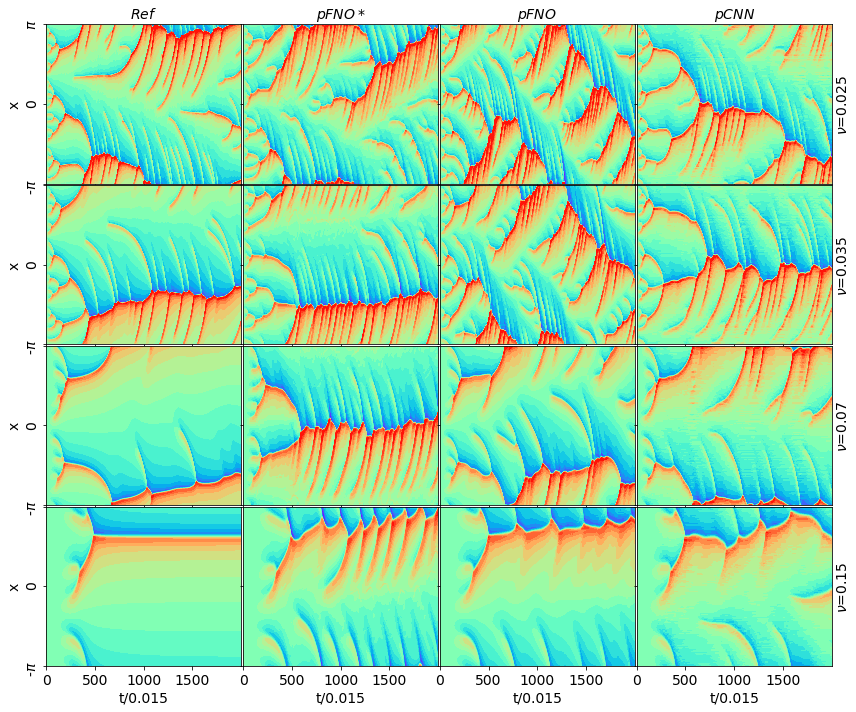

In [60]:
list_model_names = ['pFNO*', 'pFNO', 'pCNN']
#list_para_values = [0.025,0.04,0.064,0.16] # [0.025, 0.05, 0.1,0.15]  #[0.025, 0.04, 0.064,0.16] 
#list_para_values = [0.025,0.035,0.05,0.07,0.1,0.15]

list_para_values = [0.025,0.035,0.07,0.15]
list_models_for_cmp =[ [{'name':model_name, 'para_name':'nu','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]

png_filename= 'uSlope_MS.png' # None
plot_para_slope(list_models_for_cmp, i_pickplot = 3 , png_filename=png_filename, models= models)

save png:  uSlope_KS.png


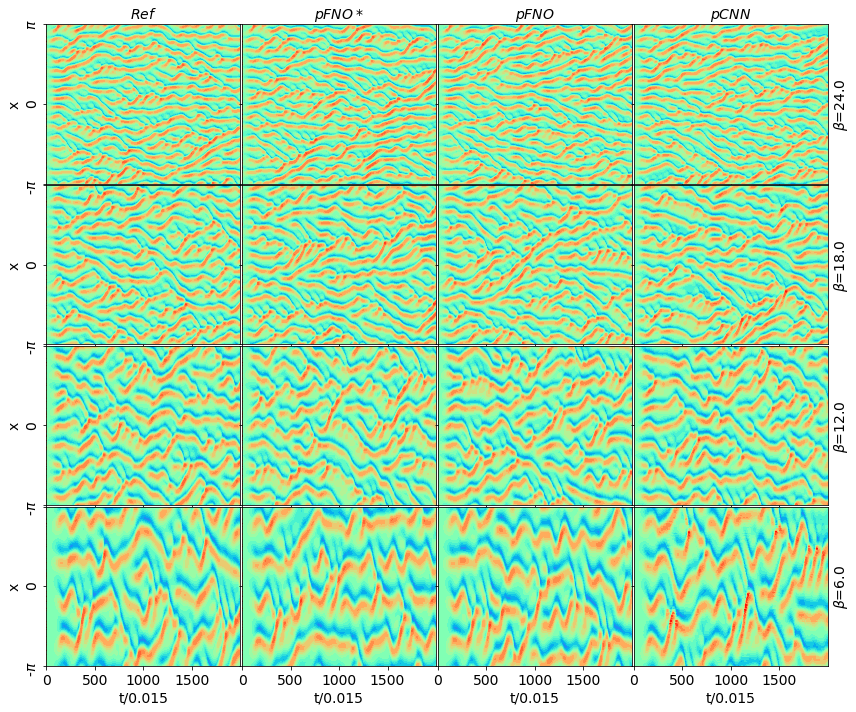

In [61]:
# models_for_cmp=[
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
# ]

# models_for_cmp2=[
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
# ]
# models_for_cmp3=[
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
# ]

list_model_names = ['pFNO*','pFNO', 'pCNN' ]#,'pCNN' ]
#list_para_values = [24.0, 21.0, 18.0, 15.0, 12.0, 10.5, 9.0, 7.5, 6.0]  # [21.0, 15.0, 10.5, 7.5] # [ 24.0, 18.0, 12.0, 9.0, 6.0]  
#list_para_values = [21.0, 15.0, 10.5, 7.5] #[21.0, 15.0, 11.5, 8.5] #

#list_para_values = [ 24.0, 18.0, 12.0, 9.0, 6.0]  
list_para_values = [ 24.0, 18.0, 12.0,  6.0]  
list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]

png_filename= 'uSlope_KS.png'

plot_para_slope(list_models_for_cmp, i_pickplot=1, png_filename=png_filename , models= models)

